- 方法相同、拟合参数表达不同 ：  模拟拟合参数不同，EQ13
- 回归方程 ：要加时间限制，否则结果不一样；
- 函数中自动跳过为空的数据 ；联立方程可以定义每个方程的数据源？ 
- 单一方程式 ：预测与excel有差异 ，excel预测值是“联立方程的预测结果”？
- 单一方程参数 = 联立方程参数 ？ 基线拟合参数 = 场景拟合参数
- d 哑变量，是否作为数据源不变，还是需要提取规则，当其它发生变化，可能引起d变量发生改变

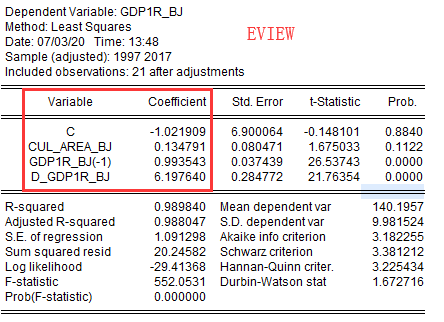

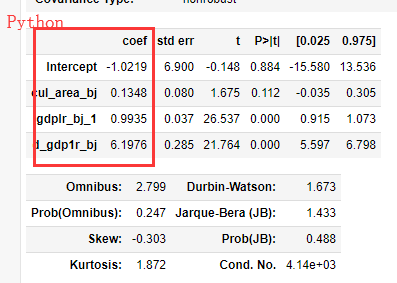

In [2]:
#引包：引入所需python包
import xlrd
import os
import re
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm

from sklearn.metrics import roc_curve,auc
import matplotlib as mpl
from matplotlib import pyplot as plt
from numpy import nan
from sklearn import linear_model, datasets
from sklearn.model_selection import train_test_split
from statsmodels.tsa.statespace.sarimax import SARIMAX
import seaborn as sns
import time

from scipy.stats import kstest
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [3]:
dir = r"./data/"
print(os.listdir(dir))  #手术种类

['【20200703】-预测误差(2015-2017).xls', '【20200703】-模拟（2016，10）-3.xls', '【20200703】-模拟（2016，6-8）-2.xls', '【20200703】-模拟（2016,1-4）-1.xls', '其它数据.csv', '.ipynb_checkpoints', 'alleviewsdata.xlsx', '方程描述.csv']


# 数据源

## excel数据源
- 通过"预测误差表"获得数据源；

- 也可以通过模拟误差获得数据源，但是那样更复杂一些。

In [4]:
file = "alleviewsdata.xlsx"
df_ev= pd.read_excel(dir+file,"Sheet1",index_col = 0 ,na_values=['9999'])
df_ev.columns = df_ev.columns.str.lower()
df_ev.columns

Index(['con_fn_bj', 'con_fn_bj_0', 'con_fn_bj_1', 'con_fn_bj_10',
       'con_fn_bj_2', 'con_fn_bj_3', 'con_fn_bj_4', 'con_fn_bj_5',
       'con_fn_bj_6', 'con_fn_bj_7',
       ...
       'yht_un_tj_1', 'yht_un_tj_10', 'yht_un_tj_2', 'yht_un_tj_3',
       'yht_un_tj_4', 'yht_un_tj_5', 'yht_un_tj_6', 'yht_un_tj_7',
       'yht_un_tj_8', 'yht_un_tj_9'],
      dtype='object', length=3722)

## 衍生变量
- 根据定义式衍生的变量

# 定义
## 参数
## 函数

# 河北
## Eq 209 : gdp1r_hb 行为方程 ok
行为方程 ： gdp1r_hb  = gdp1r_hb(-1) 

In [5]:
test1 = df_ev[["gdp1r_hb"]]
test1["gdplr_hb_s1"] = test1["gdp1r_hb"].shift(1)  ##直接写进表达式，结果有差异
test1 = test1[(test1.index>1996) & (test1.index <2019)]
test1.head(2)

,gdp1r_hb,gdplr_hb_s1
1997,1417.319407,1330.377353
1998,1514.941218,1417.319407


In [6]:
results = sm.ols(formula = "gdp1r_hb ~ gdplr_hb_s1 ",data = test1).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               gdp1r_hb   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 3.053e+04
Date:                Tue, 21 Jul 2020   Prob (F-statistic):           2.55e-33
Time:                        06:55:52   Log-Likelihood:                -96.068
No. Observations:                  22   AIC:                             196.1
Df Residuals:                      20   BIC:                             198.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      88.5704     14.909      5.941      0.000      57.470     119.671
gdplr_hb_s1     1.0101      0.006    174.719      0.000       0.998       1.022
==============================================================================
Omnibus:                        0.373   Durbin-Watson:                   1.073
Prob(Omnibus):                  0.830   Jarque-Bera (JB):                0.213
Skew:                           0.221   Prob(JB):                        0.899
Kurtosis:                       2.808   Cond. No.                     9.02e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.02e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [7]:
results.predict()

array([1432.33122685, 1520.14790883, 1618.75178419, 1695.42664883,
       1786.66861618, 1880.46177072, 1984.14710379, 2113.46897325,
       2262.56305855, 2411.68195089, 2541.24606156, 2652.92190014,
       2786.1767172 , 2884.91704555, 2995.01786333, 3124.91325584,
       3254.07982027, 3363.45570101, 3479.66586535, 3562.62090901,
       3685.96192219, 3828.53489584])

In [14]:
test1["gdp1r_hb"]

1997    1417.319407
1998    1514.941218
1999    1590.852425
2000    1681.185650
2001    1774.044653
2002    1876.697312
2003    2004.731175
2004    2152.340329
2005    2299.974043
2006    2428.247734
2007    2538.811316
2008    2670.738955
2009    2768.495860
2010    2877.500107
2011    3006.101781
2012    3133.981886
2013    3242.268417
2014    3357.321163
2015    3439.450000
2016    3561.562574
2017    3702.715565
2018    3825.879429
Name: gdp1r_hb, dtype: float64

## Eq210: gdpn_hb 定义方程 ok
定义方程 ： gdpn_hb  = gdp1n_hb  + gdp2n_hb  + gdp3n_hb

In [16]:
test1 = df_ev[["gdpn_hb","gdp1n_hb","gdp2n_hb","gdp3n_hb"]]
test1 = test1[(test1.index>1996) & (test1.index <2018)]
test1["预测"] = test1["gdp1n_hb"] + test1["gdp2n_hb"] + test1["gdp3n_hb"]
test1.head(2)

,gdpn_hb,gdp1n_hb,gdp2n_hb,gdp3n_hb,预测
1997,3953.78,761.76,1934.38,1257.64,3953.78
1998,4256.01,790.60,2084.33,1381.08,4256.01


## Eq211 ：gdpr_hb 定义方程 ok
定义方程 ： gdpr_hb  = gdp1r_hb  + gdp2r_hb  + gdp3r_hb

In [17]:
test1 = df_ev[["gdpr_hb","gdp1r_hb","gdp2r_hb","gdp3r_hb"]]
test1 = test1[(test1.index>1996) & (test1.index <2018)]
test1["预测"] = test1["gdp1r_hb"] + test1["gdp2r_hb"] + test1["gdp3r_hb"]
test1.head(2)

,gdpr_hb,gdp1r_hb,gdp2r_hb,gdp3r_hb,预测
1997,5064.865975,1417.319407,1959.342789,1688.203779,5064.865975
1998,5606.806635,1514.941218,2212.619885,1879.245532,5606.806635


## Eq212 : gdp1n_hb 定义方程 ok
定义方程 ： gdp1n_hb  = gdp1r_hb  * gdp1d_hb  / 100

In [18]:
test1 = df_ev[["gdp1n_hb","gdp1r_hb","gdp1d_hb"]]
test1 = test1[(test1.index>1996) & (test1.index <2018)]
test1["验证结果"] = test1["gdp1r_hb"]*test1["gdp1d_hb"]/100
test1.head(2)

,gdp1n_hb,gdp1r_hb,gdp1d_hb,验证结果
1997,761.76,1417.319407,53.746530,761.76
1998,790.60,1514.941218,52.186843,790.60


## Eq213 : gdp2_indan_hb 定义方程 ok
定义方程 ： gdp2_indan_hb  = gdp2_indar_hb  * gdp2_indad_hb  / 100


In [19]:
test1 = df_ev[["gdp2_indan_hb","gdp2_indar_hb","gdp2_indad_hb"]]
test1 = test1[(test1.index>1996) & (test1.index <2018)]
test1["验证结果"] = test1["gdp2_indar_hb"]*test1["gdp2_indad_hb"]/100
test1.head(2)

,gdp2_indan_hb,gdp2_indar_hb,gdp2_indad_hb,验证结果
1997,1701.42,1794.985483,94.787396,1701.42
1998,1822.05,2012.178726,90.551101,1822.05


## Eq214 ：gdp2_bindan_hb 定义方程 ok
定义方程 ： gdp2_bindan_hb  = gdp2_bindar_hb  * gdp2_bindad_hb  / 100

In [20]:
test1 = df_ev[["gdp2_bindan_hb","gdp2_bindar_hb","gdp2_bindad_hb"]]
test1 = test1[(test1.index>1996) & (test1.index <2018)]
test1["预测"] = test1["gdp2_bindar_hb"]*test1["gdp2_bindad_hb"]/100
test1.head(2)

,gdp2_bindan_hb,gdp2_bindar_hb,gdp2_bindad_hb,预测
1997,232.96,364.560630,63.901579,232.96
1998,262.28,413.047194,63.498797,262.28


## Eq215 : gdp2n_hb 定义方程 ok
定义方程 ： gdp2n_hb  = gdp2r_hb  * gdp2d_hb  / 100


In [21]:
test1 = df_ev[["gdp2n_hb","gdp2r_hb","gdp2d_hb"]]
test1 = test1[(test1.index>1996) & (test1.index <2018)]
test1["预测"] = test1["gdp2r_hb"]*test1["gdp2d_hb"]/100
test1.head(2)

,gdp2n_hb,gdp2r_hb,gdp2d_hb,预测
1997,1934.38,1959.342789,98.725961,1934.38
1998,2084.33,2212.619885,94.201901,2084.33


## Eq216 ： gdp2r_hb2 定义方程 ok
定义方程 ： gdp2r_hb2  = gdp2_indar_hb  + gdp2_bindar_hb  + gdp2r_erro_hb

In [22]:
test1 = df_ev[["gdp2r_hb2","gdp2_indar_hb","gdp2_bindar_hb","gdp2r_erro_hb"]]
test1 = test1[(test1.index>1996) & (test1.index <2018)]
test1["预测"] = test1["gdp2_indar_hb"] + test1["gdp2_bindar_hb"] + test1["gdp2r_erro_hb"]
test1.head(2)

,gdp2r_hb2,gdp2_indar_hb,gdp2_bindar_hb,gdp2r_erro_hb,预测
1997,1959.342789,1794.985483,364.560630,-200.203323,1959.342789
1998,2212.619885,2012.178726,413.047194,-212.606035,2212.619885


## Eq217 : gdp2r_hb1 行为方程 ok
gdp2r_hb1  = @coef(1)  + @coef(2) * gdp2_tecn_hb / gdp2d_hb(-1)  + @coef(3) * gdp2r_hb1(-1)  + @coef(4) * d_gdp2r_hb_1

- gdp_tecn_hb / gdp2d_hb : 可以将表达式写入方程中，但参数估计结果不一样

In [25]:
test1 = df_ev[["gdp2r_hb1","gdp2_tecn_hb","gdp2d_hb","d_gdp2r_hb_1"]]
test1["gdp2r_hb1_s1"] = test1["gdp2r_hb1"].shift(1)
test1["gdp2_tecn_gdp2d"] = test1["gdp2_tecn_hb"]/test1["gdp2d_hb"].shift(1)
test1 = test1[(test1.index>2013) & (test1.index <2020)]
test1.head(2)

,gdp2r_hb1,gdp2_tecn_hb,gdp2d_hb,d_gdp2r_hb_1,gdp2r_hb1_s1,gdp2_tecn_gdp2d
2014,13761.661974,1683.943782,109.091838,-0.45,13113.028472,14.938321
2015,14460.310000,1923.063799,100.000000,-0.20,13761.661974,17.627935


In [26]:
#results = sm.ols(formula = "gdp2r_hb1 ~ gdp_tecn_hb/gdp2d_hb  + gdp2r_hb1.shift(1) + d_gdp2r_hb_1",data = test1 ).fit()
results = sm.ols(formula = "gdp2r_hb1 ~ gdp2_tecn_gdp2d  + gdp2r_hb1_s1 + d_gdp2r_hb_1",data = test1 ).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              gdp2r_hb1   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.162e+04
Date:                Tue, 14 Jul 2020   Prob (F-statistic):           4.62e-05
Time:                        02:04:24   Log-Likelihood:                -19.210
No. Observations:                   6   AIC:                             46.42
Df Residuals:                       2   BIC:                             45.59
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2483.2258    123.381     20.127      0.002    1952.361    3014.091
gdp2_tecn_gdp2d    15.7536      2.363      6.667      0.022       5.586      25.921
gdp2r_hb1_s1        0.8542      0.012     72.950      0.000       0.804       0.905
d_gdp2r_hb_1      340.3565      9.827     34.636      0.001     298.076     382.637
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.981
Prob(Omnibus):                    nan   Jarque-Bera (JB):                1.098
Skew:                           1.047   Prob(JB):                        0.578
Kurtosis:                       2.942   Cond. No.                     4.34e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.34e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Eq218 ：gdp2r_hb 定义方程  ok
定义方程 ： gdp2r_hb  = (gdp2r_hb1  + gdp2r_hb2)  / 2

In [27]:
test1 = df_ev[["gdp2r_hb","gdp2r_hb1","gdp2r_hb2"]]
test1 = test1[(test1.index>1996) & (test1.index <2018)]
test1["预测"] = (test1["gdp2r_hb1"] + test1["gdp2r_hb2"])/2
test1.head(2)

,gdp2r_hb,gdp2r_hb1,gdp2r_hb2,预测
1997,1959.342789,1959.342789,1959.342789,1959.342789
1998,2212.619885,2212.619885,2212.619885,2212.619885


## Eq219 :gdp3n_hb 定义方程 ok
定义方程 ： gdp3n_hb  = gdp3r_hb  * gdp3d_hb  / 100

In [28]:
test1 = df_ev[["gdp3n_hb","gdp3r_hb","gdp3d_hb"]]
test1 = test1[(test1.index>1996) & (test1.index <2018)]
test1["预测"] = (test1["gdp3r_hb"] * test1["gdp3d_hb"])/100
test1.head(2)

,gdp3n_hb,gdp3r_hb,gdp3d_hb,预测
1997,1257.64,1688.203779,74.495746,1257.64
1998,1381.08,1879.245532,73.491195,1381.08


## Eq220 : gdp2_indar_hb 行为方程 ok
log(gdp2_indar_hb)  = @coef(1)  + @coef(2) * log(consr_hb)  + @coef(3) * log(investr_hb)  + @coef(4) * log(exusd_hb * exrate_cn)  + @coef(5) * d_gdp2_indar_hb

In [29]:
test1 = df_ev[["gdp2_indar_hb","consr_hb","investr_hb","exusd_hb","exrate_cn","d_gdp2_indar_hb"]]
test1 = test1[(test1.index>2004) & (test1.index <2019)]
test1.head(2)

,gdp2_indar_hb,consr_hb,investr_hb,exusd_hb,exrate_cn,d_gdp2_indar_hb
2005,4524.322324,3916.975436,5058.508980,109.2685,819.17,0.0
2006,5243.689574,4431.266174,6498.832337,128.3469,797.18,0.0


In [30]:
results = sm.ols(formula = "np.log(gdp2_indar_hb) ~ np.log(consr_hb)  + np.log(investr_hb) + np.log(exusd_hb * exrate_cn) + d_gdp2_indar_hb",data = test1 ).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(gdp2_indar_hb)   R-squared:                       0.999
Model:                               OLS   Adj. R-squared:                  0.999
Method:                    Least Squares   F-statistic:                     2836.
Date:                   Tue, 14 Jul 2020   Prob (F-statistic):           6.11e-14
Time:                           02:07:55   Log-Likelihood:                 44.003
No. Observations:                     14   AIC:                            -78.01
Df Residuals:                          9   BIC:                            -74.81
Df Model:                              4                                         
Covariance Type:               nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        1.3308      0.227      5.861      0.000       0.817       1.845
np.log(consr_hb)                 0.2603      0.072      3.611      0.006       0.097       0.423
np.log(investr_hb)               0.3259      0.051      6.414      0.000       0.211       0.441
np.log(exusd_hb * exrate_cn)     0.1890      0.028      6.675      0.000       0.125       0.253
d_gdp2_indar_hb                  0.0274      0.005      5.506      0.000       0.016       0.039
==============================================================================
Omnibus:                        2.426   Durbin-Watson:                   1.896
Prob(Omnibus):                  0.297   Jarque-Bera (JB):                0.576
Skew:                          -0.321   Prob(JB):                        0.750
Kurtosis:                       3.758   Cond. No.                     1.19e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.19e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Eq221 ：gdp2_bindar_hb 行为方程 NO 系数表达不一样
log(gdp2_bindar_hb)  = @coef(1)  + @coef(2) * log(investr_hb)  + @coef(3) * d_gdp2_bindar_hb  + [ar(1) = @coef(4) , ar(2) = @coef(5) , estsmpl = "2007 2018"]

In [33]:
test1 = df_ev[["gdp2_bindar_hb","investr_hb","d_gdp2_bindar_hb"]]
test1["investr_hb_log"] = np.log(test1["investr_hb"])
test1 = test1[(test1.index>2006) & (test1.index <2019)]
ar = (1,1) 
ma = 0
mod = SARIMAX(endog = np.log(test1["gdp2_bindar_hb"])  , exog = test1[["investr_hb_log","d_gdp2_bindar_hb"]],order =(ar,0,ma),enforce_invertibility= False , trend = 'c', enforce_stationarity = False)
results = mod.fit()

results.summary() #results.summary().tables[1]

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:         gdp2_bindar_bj   No. Observations:                   12
Model:               SARIMAX(2, 0, 0)   Log Likelihood                  24.083
Date:                Tue, 14 Jul 2020   AIC                            -36.167
Time:                        02:11:07   BIC                            -34.351
Sample:                             0   HQIC                           -38.158
                                 - 12                                         
Covariance Type:                  opg                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
intercept            0.0185      0.181      0.102      0.919      -0.337       0.374
investr_bj_log       0.4621      0.533      0.866      0.386      -0.583       1.508
d_gdp2_bindar_hb     0.0082      0.026      0.315      0.752      -0.043       0.059
ar.L1                0.7186      2.128      0.338      0.736      -3.452       4.889
ar.L2                0.2991      2.208      0.135      0.892      -4.028       4.626
sigma2               0.0005      0.001      0.446      0.655      -0.002       0.003
===================================================================================
Ljung-Box (Q):                       13.92   Jarque-Bera (JB):                 1.05
Prob(Q):                              0.13   Prob(JB):                         0.59
Heteroskedasticity (H):               1.79   Skew:                            -0.73
Prob(H) (two-sided):                  0.65   Kurtosis:                         2.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [34]:
predict = np.exp(results.predict(exog = np.log(df_ev["investr_bj"])))
predict

2007      48.482885
2008     242.491514
2009     575.915173
2010     638.924638
2011     669.865166
2012     699.606192
2013     770.536254
2014     859.854500
2015     935.593984
2016    1032.387259
2017    1099.479173
2018    1065.595975
dtype: float64

## Eq222 ：gdp3r_hb 行为方程  ok
gdp3r_hb  = @coef(1)  + @coef(2) * d(gdp2r_hb)  + @coef(3) * gdp3r_hb(-1)  + @coef(4) * d_gdp3r_hb

In [37]:
test1 = df_ev[["gdp3r_hb","gdp2r_hb","d_gdp3r_hb"]]
test1["gdp2r_hb_diff"] = test1["gdp2r_hb"] - test1["gdp2r_hb"].shift(1)
test1["gdp3r_hb_s1"] = test1["gdp3r_hb"].shift(1)           
test1 = test1[(test1.index>1996) & (test1.index <2019)]
test1.head(2)

,gdp3r_hb,gdp2r_hb,d_gdp3r_hb,gdp2r_hb_diff,gdp3r_hb_s1
1997,1688.203779,1959.342789,0.0,272.253321,1484.636268
1998,1879.245532,2212.619885,0.0,253.277096,1688.203779


In [38]:
results = sm.ols(formula = "gdp3r_hb ~ gdp2r_hb_diff  +  gdp3r_hb_s1 + d_gdp3r_hb",data = test1 ).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               gdp3r_hb   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.003e+04
Date:                Tue, 14 Jul 2020   Prob (F-statistic):           1.78e-33
Time:                        02:14:38   Log-Likelihood:                -121.86
No. Observations:                  22   AIC:                             251.7
Df Residuals:                      18   BIC:                             256.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        24.4615     35.266      0.694      0.497     -49.629      98.552
gdp2r_hb_diff     0.0856      0.050      1.704      0.106      -0.020       0.191
gdp3r_hb_s1       1.0991      0.004    274.336      0.000       1.091       1.107
d_gdp3r_hb       79.3460     16.472      4.817      0.000      44.741     113.951
==============================================================================
Omnibus:                        1.855   Durbin-Watson:                   1.833
Prob(Omnibus):                  0.396   Jarque-Bera (JB):                1.176
Skew:                           0.565   Prob(JB):                        0.555
Kurtosis:                       2.921   Cond. No.                     1.78e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.78e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Eq223：investn_hb 定义方程 yes

investn_hb  = investr_hb  * faipi_hb  / 100


In [41]:
test1 = df_ev[["investn_hb" ,"investr_hb" , "faipi_hb"]]
test1["验证结果"] = (test1["investr_hb"] * test1["faipi_hb"]) /100
test1.tail(4)

,investn_hb,investr_hb,faipi_hb,验证结果
2017,33406.800000,31498.079385,106.0598,33406.8
2018,35411.208000,32399.771129,NaN,NaN
2019,37571.291688,32778.218992,NaN,NaN
2020,NaN,NaN,NaN,NaN


## Eq224：consr_hb 定义方程 ok
consr_hb  = consn_hb  / rpi_hb  * 100

In [42]:
test1 = df_ev[["consr_hb" ,"consn_hb" , "rpi_hb"]]
test1["预测"] = (test1["consn_hb"] /test1["rpi_hb"])*100
test1.tail(4)

,consr_hb,consn_hb,rpi_hb,预测
2017,15408.953011,15907.64947,102.575408,15508.248780
2018,15643.233005,16537.10000,103.887952,15918.207648
2019,16470.695773,17934.20000,105.279838,17034.790654
2020,NaN,NaN,NaN,NaN


## Eq225 ： gdper_hb 定义方程 ok

gdper_hb  = gdpen_hb  * gdpd_hb  / 100


In [44]:
test1 = df_ev[["gdper_hb" ,"gdpen_hb" , "gdpd_hb"]]
test1["预测"] = (test1["gdpen_hb"] * test1["gdpd_hb"])/100
test1.tail(4)

,gdper_hb,gdpen_hb,gdpd_hb,预测
2017,33797.336926,34016.32,100.242888,34098.94163
2018,35994.163826,NaN,89.914134,NaN
2019,38441.766966,NaN,90.951197,NaN
2020,NaN,NaN,NaN,NaN


## Eq226 ：gdpen_hb 定义方程 ok
gdpen_hb  = con_fn_hb  + inv_fon_hb  + nex_gsn_hb

In [48]:
test1 = df_ev[["gdpen_hb","con_fn_hb" ,"inv_fon_hb" , "nex_gsn_hb"]]
test1["预测"] = test1["con_fn_hb"] + test1["inv_fon_hb"] + test1["nex_gsn_hb"]
test1.tail(4)

,gdpen_hb,con_fn_hb,inv_fon_hb,nex_gsn_hb,预测
2017,34016.32,16055.7,19083.16,-1122.54,34016.32
2018,NaN,NaN,NaN,NaN,NaN
2019,NaN,NaN,NaN,NaN,NaN
2020,NaN,NaN,NaN,NaN,NaN


## Eq227 ：con_fn_hb 行为方程 ok
con_fn_hb  = @coef(1)  + @coef(2) * consn_hb

In [49]:
test1 = df_ev[["con_fn_hb" ,"consn_hb"]]
test1 = test1[(test1.index>2004) & (test1.index <2018)]
results = sm.ols(formula = "con_fn_hb ~ consn_hb ",data = test1).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              con_fn_hb   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     1121.
Date:                Tue, 14 Jul 2020   Prob (F-statistic):           2.01e-12
Time:                        02:27:01   Log-Likelihood:                -94.852
No. Observations:                  13   AIC:                             193.7
Df Residuals:                      11   BIC:                             194.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2283.7934    245.263      9.312      0.000    1743.972    2823.614
consn_hb       0.8659      0.026     33.486      0.000       0.809       0.923
==============================================================================
Omnibus:                        0.163   Durbin-Watson:                   0.704
Prob(Omnibus):                  0.922   Jarque-Bera (JB):                0.314
Skew:                           0.202   Prob(JB):                        0.854
Kurtosis:                       2.354   Cond. No.                     2.16e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.16e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Eq228 ：investr_hb 行为方程 ok
investr_hb  = @coef(1)  + @coef(2) * loann_hb / faipi_hb * 100  + [ar(1) = @coef(3) , ar(2) = @coef(4) , estsmpl = "2008 2017"]

In [53]:
test1 = df_ev[["investr_hb","loann_hb","faipi_hb"]]
test1["loann_faipi_100"] = test1["loann_hb"]/test1["faipi_hb"]*100
test1 = test1[(test1.index>2007) & (test1.index <2018)]
ar =(1,1)  
ma = 0
mod = SARIMAX(endog = test1["investr_hb"] , exog = test1[["loann_faipi_100"]],order =(ar,0,ma),enforce_invertibility= False , trend = 'c', enforce_stationarity = False)
results = mod.fit()
results.summary() #results.summary().tables[1]

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             investr_hb   No. Observations:                   10
Model:               SARIMAX(2, 0, 0)   Log Likelihood                 -64.716
Date:                Tue, 14 Jul 2020   AIC                            139.431
Time:                        02:32:46   BIC                            139.829
Sample:                             0   HQIC                           136.752
                                 - 10                                         
Covariance Type:                  opg                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
intercept         445.6811   2153.040      0.207      0.836   -3774.200    4665.562
loann_faipi_100     0.8357      0.288      2.904      0.004       0.272       1.400
ar.L1               1.7854      0.606      2.947      0.003       0.598       2.973
ar.L2              -1.2640      2.233     -0.566      0.571      -5.641       3.113
sigma2           6.505e+05    7.4e+05      0.880      0.379   -7.99e+05     2.1e+06
===================================================================================
Ljung-Box (Q):                        3.01   Jarque-Bera (JB):                 0.94
Prob(Q):                              0.88   Prob(JB):                         0.62
Heteroskedasticity (H):               0.17   Skew:                             0.84
Prob(H) (two-sided):                  0.18   Kurtosis:                         3.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Eq229 ：consn_hb 行为方程 ok
consn_hb  = @coef(1)  + @coef(2) * d(yht_n_hb)  + @coef(3) * consn_hb(-1)

In [54]:
test1 = df_ev[["consn_hb" ,"yht_n_hb" ]]
test1["yht_n_hb_diff"] = test1["yht_n_hb"] - test1["yht_n_hb"].shift(1)
test1["consn_hb_s1"] = test1["consn_hb"].shift(1)
test1 = test1[(test1.index>2005) & (test1.index <2018)]
results = sm.ols(formula = "consn_hb ~ yht_n_hb_diff +consn_hb_s1 ",data = test1 ).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               consn_hb   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     7999.
Date:                Tue, 14 Jul 2020   Prob (F-statistic):           2.37e-15
Time:                        02:37:12   Log-Likelihood:                -71.638
No. Observations:                  12   AIC:                             149.3
Df Residuals:                       9   BIC:                             150.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        48.2899    138.602      0.348      0.736    -265.249     361.829
yht_n_hb_diff     0.9748      0.252      3.869      0.004       0.405       1.545
consn_hb_s1       0.9956      0.022     45.753      0.000       0.946       1.045
==============================================================================
Omnibus:                        2.226   Durbin-Watson:                   1.685
Prob(Omnibus):                  0.329   Jarque-Bera (JB):                0.918
Skew:                           0.022   Prob(JB):                        0.632
Kurtosis:                       1.646   Cond. No.                     3.87e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.87e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Eq230 : exusd_hb 行为方程 ok
exusd_hb  = @coef(1)  + @coef(2) * exusd_ch  + @coef(3) * d(exusd_hb)

In [56]:
test1 = df_ev[["exusd_hb","exusd_ch"]]
test1["exusd_hb_diff"] = test1["exusd_hb"] - test1["exusd_hb"].shift(1)
test1 = test1[(test1.index>2005) & (test1.index <2019)]
test1.head(2)

,exusd_hb,exusd_ch,exusd_hb_diff
2006,128.3469,9689.78,19.0784
2007,170.1651,12200.60,41.8182


In [58]:
results = sm.ols(formula = "exusd_hb ~ exusd_ch + exusd_hb_diff",data = test1).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               exusd_hb   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     160.8
Date:                Tue, 14 Jul 2020   Prob (F-statistic):           2.49e-08
Time:                        02:40:38   Log-Likelihood:                -51.246
No. Observations:                  13   AIC:                             108.5
Df Residuals:                      10   BIC:                             110.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -4.5167     15.590     -0.290      0.778     -39.254      30.221
exusd_ch          0.0145      0.001     17.845      0.000       0.013       0.016
exusd_hb_diff     0.1786      0.094      1.899      0.087      -0.031       0.388
==============================================================================
Omnibus:                        0.379   Durbin-Watson:                   1.641
Prob(Omnibus):                  0.827   Jarque-Bera (JB):                0.476
Skew:                           0.295   Prob(JB):                        0.788
Kurtosis:                       2.273   Cond. No.                     7.56e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.56e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Eq231 : imusd_hb 行为方程 ok
log(imusd_hb)  = @coef(1)  + @coef(2) * log(imusd_hb(-1))  + @coef(3) * log(exusd_hb)  + @coef(4) * d_imusd_hb

In [63]:
test1 = df_ev[["imusd_hb" ,"exusd_hb" , "d_imusd_hb"]]
test1["imusd_hb_s1"] = test1["imusd_hb"].shift(1)
test1 = test1[(test1.index>2005) & (test1.index <2019)]
results = sm.ols(formula = "np.log(imusd_hb) ~ np.log(imusd_hb_s1) + np.log(exusd_hb) + d_imusd_hb",data = test1 ).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       np.log(imusd_hb)   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     90.17
Date:                Tue, 14 Jul 2020   Prob (F-statistic):           4.92e-07
Time:                        02:47:15   Log-Likelihood:                 17.775
No. Observations:                  13   AIC:                            -27.55
Df Residuals:                       9   BIC:                            -25.29
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               1.5001      0.367      4.085      0.003       0.670       2.331
np.log(imusd_hb_s1)     0.4279      0.087      4.925      0.001       0.231       0.624
np.log(exusd_hb)        0.4616      0.116      3.964      0.003       0.198       0.725
d_imusd_hb              0.2839      0.044      6.411      0.000       0.184       0.384
==============================================================================
Omnibus:                        1.246   Durbin-Watson:                   2.509
Prob(Omnibus):                  0.536   Jarque-Bera (JB):                0.785
Skew:                           0.184   Prob(JB):                        0.675
Kurtosis:                       1.854   Cond. No.                         161.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Eq232 ： yht_n_hb 定义方程 ok
yht_n_hb = yht_rn_hb + yht_un_hb

In [65]:
test1 = df_ev[["yht_n_hb" ,"yht_rn_hb","yht_un_hb"]]
test1["预测"] = test1["yht_rn_hb"] + test1["yht_un_hb"]
test1.tail(4)

,yht_n_hb,yht_rn_hb,yht_un_hb,预测
2017,16961.1,4412.788,12548.31,16961.098
2018,NaN,NaN,NaN,NaN
2019,NaN,NaN,NaN,NaN
2020,NaN,NaN,NaN,NaN


## Eq233 :yh_un_hb  定义方程
yh_un_hb  = yht_un_hb  / popu_hb

In [67]:
test1 = df_ev[["yh_un_hb" ,"yht_un_hb","popu_hb"]]
test1["预测"] = (test1["yht_un_hb"] / test1["popu_hb"])
test1.tail(4)

,yh_un_hb,yht_un_hb,popu_hb,预测
2017,30547.75811,12548.31,0.413649,30335.646889
2018,32997.00000,NaN,0.426402,NaN
2019,35738.00000,NaN,0.437449,NaN
2020,NaN,NaN,NaN,NaN


## Eq234 : yh_rn_hb 定义方程
yh_rn_hb  = yht_rn_hb  / popr_hb

In [69]:
test1 = df_ev[["yh_rn_hb" ,"yht_rn_hb","popr_hb"]]
test1["预测"] = (test1["yht_rn_hb"] / test1["popr_hb"])
test1.tail(4)

,yh_rn_hb,yht_rn_hb,popr_hb,预测
2017,12880.938641,4412.788,0.338303,13043.892605
2018,14031.000000,NaN,0.329228,NaN
2019,15373.000000,NaN,0.321748,NaN
2020,NaN,NaN,NaN,NaN


## Eq235:  yhn_hb 定义方程
yhn_hb  = yht_n_hb  / totpop_hb

In [71]:
test1 = df_ev[["yhn_hb" ,"yht_n_hb","totpop_hb"]]
test1["预测"] = (test1["yht_n_hb"] / test1["totpop_hb"])
test1.tail(4)

,yhn_hb,yht_n_hb,totpop_hb,预测
2017,21484.126671,16961.1,0.751952,22556.094006
2018,23446.000000,NaN,0.755630,NaN
2019,25665.000000,NaN,0.759197,NaN
2020,NaN,NaN,NaN,NaN


## Eq236 :  conet_un_hb 定义方程
conet_un_hb  = cone_un_hb  * popu_hb

In [73]:
test1 = df_ev[["conet_un_hb" ,"cone_un_hb","popu_hb"]]
test1["预测"] = test1["cone_un_hb"] * test1["popu_hb"]
test1.tail(4)

,conet_un_hb,cone_un_hb,popu_hb,预测
2017,8384.7850,20600.348287,0.413649,8521.313469
2018,9434.9528,22127.000000,0.426402,9434.997054
2019,10271.4642,23483.000000,0.437449,10272.614867
2020,NaN,NaN,NaN,NaN


## Eq237   定义方程
conet_rn_hb  = cone_rn_hb  * popr_hb

In [74]:
test1 = df_ev[["conet_rn_hb" ,"cone_rn_hb","popr_hb"]]
test1["预测"] = test1["cone_rn_hb"] * test1["popr_hb"]
test1.tail(4)

,conet_rn_hb,cone_rn_hb,popr_hb,预测
2017,3630.8060,10535.944294,0.338303,3564.341562
2018,3747.2836,11383.000000,0.329228,3747.602324
2019,3980.0724,12372.000000,0.321748,3980.666256
2020,NaN,NaN,NaN,NaN


## Eq238 : yht_un_hb 行为方程 no 结果有细微差别
yht_un_hb  = @coef(1)  + @coef(2) * (gdp2n_hb + gdp3n_hb(-1) - taxn_hb)  + @coef(3) * yht_un_hb(-1)  + @coef(4) * d_yht_un_hb

In [75]:
test1 = df_ev[["yht_un_hb","gdp2n_hb","gdp3n_hb","taxn_hb","d_yht_un_hb"]]
test1["yht_un_hb_s1"] = test1["yht_un_hb"].shift(1)
test1["gdp2gdp3tax"] = test1["gdp2n_hb"] + test1["gdp3n_hb"].shift(1) - test1["taxn_hb"]
test1 = test1[(test1.index>2006) & (test1.index <2018)]
results = sm.ols(formula = "yht_un_hb ~ gdp2gdp3tax + yht_un_hb_s1 + d_yht_un_hb",data = test1 ).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              yht_un_hb   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.108e+04
Date:                Tue, 14 Jul 2020   Prob (F-statistic):           8.02e-16
Time:                        03:06:43   Log-Likelihood:                -47.407
No. Observations:                  11   AIC:                             102.8
Df Residuals:                       7   BIC:                             104.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       71.2236     43.036      1.655      0.142     -30.541     172.988
gdp2gdp3tax      0.0188      0.005      3.857      0.006       0.007       0.030
yht_un_hb_s1     1.0679      0.010    108.746      0.000       1.045       1.091
d_yht_un_hb     73.1975      7.880      9.289      0.000      54.564      91.831
==============================================================================
Omnibus:                        0.041   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.980   Jarque-Bera (JB):                0.270
Skew:                           0.038   Prob(JB):                        0.874
Kurtosis:                       2.236   Cond. No.                     1.41e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Eq239 : yht_rn_hb 行为方程
yht_rn_hb  = @coef(1)  + @coef(2) * (gdp1n_hb + gdp3n_hb)  + @coef(3) * yht_rn_hb(-1)

In [78]:
test1 = df_ev[["yht_rn_hb","gdp1n_hb","gdp3n_hb"]]
test1["gdpn_hb_13sum"] = test1["gdp1n_hb"] + test1["gdp3n_hb"]
test1["yht_rn_hb_s1"] = test1["yht_rn_hb"].shift(1)
test1 = test1[(test1.index>2005) & (test1.index <2018)]
test1.head(2)

,yht_rn_hb,gdp1n_hb,gdp3n_hb,gdpn_hb_13sum,yht_rn_hb_s1
2006,1600.376129,1461.81,3895.36,5357.17,1486.312116
2007,1780.914764,1804.72,4600.72,6405.44,1600.376129


In [79]:
results = sm.ols(formula = "yht_rn_hb ~ gdpn_hb_13sum +  yht_rn_hb_s1",data = test1 ).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              yht_rn_hb   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     1095.
Date:                Tue, 14 Jul 2020   Prob (F-statistic):           1.79e-11
Time:                        03:11:31   Log-Likelihood:                -66.662
No. Observations:                  12   AIC:                             139.3
Df Residuals:                       9   BIC:                             140.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       159.5515     63.727      2.504      0.034      15.392     303.711
gdpn_hb_13sum     0.1239      0.032      3.883      0.004       0.052       0.196
yht_rn_hb_s1      0.5041      0.135      3.744      0.005       0.200       0.809
==============================================================================
Omnibus:                        2.362   Durbin-Watson:                   1.160
Prob(Omnibus):                  0.307   Jarque-Bera (JB):                0.984
Skew:                          -0.701   Prob(JB):                        0.611
Kurtosis:                       3.051   Cond. No.                     3.86e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.86e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Eq240 : cone_un_hb 行为方程  ok
cone_un_hb  = @coef(1)  + @coef(2) * yh_un_hb  + @coef(3) * cone_un_hb(-1)

In [80]:
test1 = df_ev[["cone_un_hb" , "yh_un_hb" ]]
test1["cone_un_hb_s1"] = test1["cone_un_hb"].shift(1)
test1 = test1[(test1.index>1996) & (test1.index <2019)]
results = sm.ols(formula = "cone_un_hb ~ yh_un_hb + cone_un_hb_s1 ",data = test1 ).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             cone_un_hb   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     4136.
Date:                Tue, 14 Jul 2020   Prob (F-statistic):           8.34e-26
Time:                        03:15:36   Log-Likelihood:                -154.82
No. Observations:                  22   AIC:                             315.6
Df Residuals:                      19   BIC:                             318.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       255.4408    140.744      1.815      0.085     -39.140     550.022
yh_un_hb          0.2859      0.078      3.644      0.002       0.122       0.450
cone_un_hb_s1     0.6057      0.133      4.567      0.000       0.328       0.883
==============================================================================
Omnibus:                        4.127   Durbin-Watson:                   2.272
Prob(Omnibus):                  0.127   Jarque-Bera (JB):                2.552
Skew:                           0.260   Prob(JB):                        0.279
Kurtosis:                       4.585   Cond. No.                     4.54e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.54e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Eq241 : cone_rn_hb 行为方程 yes 结果有差异
cone_rn_hb  = @coef(1)  + @coef(2) * (yh_rn_hb + yh_rn_hb(-1))

In [84]:
test1 = df_ev[["cone_rn_hb" , "yh_rn_hb" ]]
test1["yh_rn_hb_sum"] = test1["yh_rn_hb"] + test1["yh_rn_hb"].shift(1)
test1 = test1[(test1.index>1996) & (test1.index <2018)]
results = sm.ols(formula = "cone_rn_hb ~ yh_rn_hb_sum ",data = test1 ).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             cone_rn_hb   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     2985.
Date:                Tue, 14 Jul 2020   Prob (F-statistic):           2.34e-22
Time:                        03:22:44   Log-Likelihood:                -145.00
No. Observations:                  21   AIC:                             294.0
Df Residuals:                      19   BIC:                             296.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     -972.7221    106.949     -9.095      0.000   -1196.569    -748.875
yh_rn_hb_sum     0.4629      0.008     54.631      0.000       0.445       0.481
==============================================================================
Omnibus:                        8.673   Durbin-Watson:                   1.132
Prob(Omnibus):                  0.013   Jarque-Bera (JB):                6.124
Skew:                          -1.123   Prob(JB):                       0.0468
Kurtosis:                       4.397   Cond. No.                     2.44e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.44e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Eq242: frn_hb 行为方程  ok
frn_hb  = @coef(1)  + @coef(2) * taxn_hb  + @coef(3) * d_frn_hb

In [87]:
test1 = df_ev[["frn_hb","taxn_hb","d_frn_hb"]]
test1 = test1[(test1.index>2006) & (test1.index <2019)]
results = sm.ols(formula = "frn_hb ~ taxn_hb  + d_frn_hb ",data = test1 ).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 frn_hb   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     872.2
Date:                Tue, 14 Jul 2020   Prob (F-statistic):           4.97e-11
Time:                        03:26:33   Log-Likelihood:                -70.806
No. Observations:                  12   AIC:                             147.6
Df Residuals:                       9   BIC:                             149.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    337.4010     87.866      3.840      0.004     138.634     536.168
taxn_hb        1.9476      0.059     33.119      0.000       1.815       2.081
d_frn_hb     213.3862     53.324      4.002      0.003      92.759     334.013
==============================================================================
Omnibus:                        0.040   Durbin-Watson:                   0.876
Prob(Omnibus):                  0.980   Jarque-Bera (JB):                0.157
Skew:                          -0.087   Prob(JB):                        0.925
Kurtosis:                       2.468   Cond. No.                     5.08e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.08e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Eq243 ： taxn_hb1 ok d_taxn_hb_1是模拟结果数据？¶
taxn_hb1  = @coef(1)  + @coef(2) * (tax_vadn_hb + tax_cinn_hb + tax_pinn_hb)  + @coef(3) * taxn_hb1(-1)  + @coef(4) * d_taxn_hb_1

In [91]:
test1 = df_ev[["taxn_hb1","tax_vadn_hb","tax_cinn_hb","tax_pinn_hb","d_taxn_hb_1"]]
test1["tax_sum"] = test1["tax_vadn_hb"] + test1["tax_cinn_hb"] + test1["tax_pinn_hb"]
test1["taxn_hb1_s1"] = test1["taxn_hb1"].shift(1)
test1 = test1[(test1.index>2007) & (test1.index <2018)]
results = sm.ols(formula = "taxn_hb1 ~ tax_sum + taxn_hb1_s1 +  d_taxn_hb_1 ",data = test1 ).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               taxn_hb1   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     660.7
Date:                Tue, 14 Jul 2020   Prob (F-statistic):           6.01e-08
Time:                        03:32:12   Log-Likelihood:                -46.922
No. Observations:                  10   AIC:                             101.8
Df Residuals:                       6   BIC:                             103.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     248.8875     32.604      7.634      0.000     169.109     328.666
tax_sum         0.1411      0.062      2.283      0.063      -0.010       0.292
taxn_hb1_s1     0.8759      0.037     23.468      0.000       0.785       0.967
d_taxn_hb_1   118.7310     21.868      5.430      0.002      65.223     172.239
==============================================================================
Omnibus:                        3.035   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.219   Jarque-Bera (JB):                1.023
Skew:                          -0.204   Prob(JB):                        0.600
Kurtosis:                       1.487   Cond. No.                     4.93e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.93e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##  Eq244 taxn_hb2 行为方程 ok

log(taxn_hb2)  = @coef(1)  + @coef(2) * log(gdpn_hb)  + @coef(3) * log(taxn_hb2(-1))  + @coef(4) * d_taxn_hb_2


In [94]:
test1 = df_ev[["taxn_hb2","gdpn_hb","d_taxn_hb_2"]]
test1["taxn_hb2_s1"] = test1["taxn_hb2"].shift(1)
test1 = test1[(test1.index>2007) & (test1.index <2019)]
results = sm.ols(formula = "np.log(taxn_hb2) ~ np.log(gdpn_hb)+ np.log(taxn_hb2_s1) + d_taxn_hb_2 ",data = test1 ).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       np.log(taxn_hb2)   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     887.3
Date:                Tue, 14 Jul 2020   Prob (F-statistic):           2.15e-09
Time:                        03:38:09   Log-Likelihood:                 27.732
No. Observations:                  11   AIC:                            -47.46
Df Residuals:                       7   BIC:                            -45.87
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -4.6957      1.067     -4.402      0.003      -7.218      -2.173
np.log(gdpn_hb)         0.9295      0.177      5.253      0.001       0.511       1.348
np.log(taxn_hb2_s1)     0.3596      0.104      3.460      0.011       0.114       0.605
d_taxn_hb_2            -0.1050      0.020     -5.382      0.001      -0.151      -0.059
==============================================================================
Omnibus:                        1.332   Durbin-Watson:                   2.450
Prob(Omnibus):                  0.514   Jarque-Bera (JB):                0.837
Skew:                           0.325   Prob(JB):                        0.658
Kurtosis:                       1.815   Cond. No.                     1.85e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.85e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Eq245: taxn_hb 定义方程式
taxn_hb  = (taxn_hb1  + taxn_hb2)  / 2

In [98]:
test1 = df_ev[["taxn_hb","taxn_hb1","taxn_hb2"]]
test1["预测"] = (test1["taxn_hb1"] + test1["taxn_hb2"])/2
test1.tail(4)

,taxn_hb,taxn_hb1,taxn_hb2,预测
2017,2199.35,2199.35,2199.35,2199.35
2018,2555.60,2555.60,2555.60,2555.60
2019,2630.40,2630.40,2630.40,2630.40
2020,NaN,NaN,NaN,NaN


##  Eq246 : tax_vadn_hb 行为方程式 ok
tax_vadn_hb  = @coef(1)  + @coef(2) * d(gdpn_hb)  + @coef(3) * tax_vadn_hb(-1)  + @coef(4) * d_tax_vadn_hb

In [100]:
test1 = df_ev[["tax_vadn_hb","gdpn_hb","d_tax_vadn_hb"]]
test1["gdpn_hb_diff"] = test1["gdpn_hb"]- test1["gdpn_hb"].shift(1)
test1["tax_vadn_hb_s1"] = test1["tax_vadn_hb"].shift(1)
test1 = test1[(test1.index>2007) & (test1.index <2018)]
results = sm.ols(formula = "tax_vadn_hb ~ gdpn_hb_diff + tax_vadn_hb_s1 + d_tax_vadn_hb ",data = test1 ).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            tax_vadn_hb   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     2484.
Date:                Tue, 14 Jul 2020   Prob (F-statistic):           1.14e-09
Time:                        03:47:15   Log-Likelihood:                -32.446
No. Observations:                  10   AIC:                             72.89
Df Residuals:                       6   BIC:                             74.10
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       -146.6390      9.490    -15.452      0.000    -169.860    -123.418
gdpn_hb_diff       0.0054      0.003      1.982      0.095      -0.001       0.012
tax_vadn_hb_s1     1.7584      0.022     78.735      0.000       1.704       1.813
d_tax_vadn_hb     86.9595      3.619     24.026      0.000      78.103      95.816
==============================================================================
Omnibus:                        8.123   Durbin-Watson:                   2.261
Prob(Omnibus):                  0.017   Jarque-Bera (JB):                3.160
Skew:                          -1.204   Prob(JB):                        0.206
Kurtosis:                       4.335   Cond. No.                     8.63e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Eq247: tax_cinn_hb 行为方程 ok
tax_cinn_hb  = @coef(1)  + @coef(2) * gdpn_hb  + @coef(3) * d_tax_cinn_hb

In [102]:
test1 = df_ev[["tax_cinn_hb","gdpn_hb","d_tax_cinn_hb"]]
test1 = test1[(test1.index>2006) & (test1.index <2018)]
results = sm.ols(formula = "tax_cinn_hb ~ gdpn_hb + d_tax_cinn_hb ",data = test1 ).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            tax_cinn_hb   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     525.9
Date:                Tue, 14 Jul 2020   Prob (F-statistic):           3.25e-09
Time:                        03:50:45   Log-Likelihood:                -36.601
No. Observations:                  11   AIC:                             79.20
Df Residuals:                       8   BIC:                             80.40
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -58.2192      9.913     -5.873      0.000     -81.078     -35.361
gdpn_hb           0.0105      0.000     26.098      0.000       0.010       0.011
d_tax_cinn_hb   -52.3024      9.256     -5.651      0.000     -73.647     -30.958
==============================================================================
Omnibus:                        0.599   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.539
Skew:                           0.016   Prob(JB):                        0.764
Kurtosis:                       1.916   Cond. No.                     1.20e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Eq248 ： tax_pinn_bj 行为方程  ok
从三个地区的d_*变量看，应该是原变量的矫正
tax_pinn_hb  = @coef(1)  + @coef(2) * yht_n_hb  + @coef(3) * d_tax_pinn_hb

In [104]:
test1 = df_ev[["tax_pinn_hb","yht_n_hb","d_tax_pinn_hb"]]
test1 = test1[(test1.index>2006) & (test1.index <2018)]
results = sm.ols(formula = "tax_pinn_hb ~ yht_n_hb+ d_tax_pinn_hb ",data = test1 ).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            tax_pinn_hb   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     340.3
Date:                Tue, 14 Jul 2020   Prob (F-statistic):           1.82e-08
Time:                        03:54:31   Log-Likelihood:                -20.872
No. Observations:                  11   AIC:                             47.74
Df Residuals:                       8   BIC:                             48.94
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        25.5287      1.813     14.082      0.000      21.348      29.709
yht_n_hb          0.0025      0.000     13.761      0.000       0.002       0.003
d_tax_pinn_hb    21.9615      2.256      9.734      0.000      16.759      27.164
==============================================================================
Omnibus:                        5.122   Durbin-Watson:                   2.853
Prob(Omnibus):                  0.077   Jarque-Bera (JB):                1.269
Skew:                           0.125   Prob(JB):                        0.530
Kurtosis:                       1.355   Cond. No.                     4.80e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Eq249 ： fen_hb1 行为方程
fen_hb1  = @coef(1)  + @coef(2) * frn_hb  + @coef(3) * d_fen_hb_1  + [ar(1) = @coef(4) , estsmpl = "1998 2017"]

In [105]:
test1 = df_ev[["fen_hb1","frn_hb","d_fen_hb_1"]]
test1 = test1[(test1.index>1997) & (test1.index <2018)]
ar = 1 
ma = 0
mod = SARIMAX(endog = test1["fen_hb1"] , exog = test1[["frn_hb","d_fen_hb_1"]] ,order =(ar,0,ma),enforce_invertibility= False , trend = 'c', enforce_stationarity = False)
results = mod.fit()
results.summary() #results.summary().tables[1]

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                fen_hb1   No. Observations:                   20
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -132.651
Date:                Tue, 14 Jul 2020   AIC                            275.302
Time:                        03:58:15   BIC                            280.024
Sample:                             0   HQIC                           276.101
                                 - 20                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    457.4208    112.675      4.060      0.000     236.582     678.260
frn_hb         1.3200      0.039     33.697      0.000       1.243       1.397
d_fen_hb_1   427.6402     53.892      7.935      0.000     322.013     533.267
ar.L1          2.0765      0.215      9.649      0.000       1.655       2.498
sigma2      5.475e+04   3.89e+04      1.409      0.159   -2.14e+04    1.31e+05
===================================================================================
Ljung-Box (Q):                       28.15   Jarque-Bera (JB):                 1.63
Prob(Q):                              0.06   Prob(JB):                         0.44
Heteroskedasticity (H):               0.52   Skew:                             0.29
Prob(H) (two-sided):                  0.44   Kurtosis:                         1.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Eq250 ： fen_hb_2 行为方程 sarmax
fen_hb2  = @coef(1)  + @coef(2) * (fe_edun_hb + fe_tecn_hb + fe_culn_hb + fe_ssen_hb + fe_medn_hb + fe_eepn_hb)  + [ar(1) = @coef(3) , estsmpl = "2008 2017"]

In [107]:
test1 = df_ev[["fen_hb2","fe_edun_hb","fe_tecn_hb","fe_culn_hb","fe_ssen_hb","fe_medn_hb","fe_eepn_hb"]]
test1["fen_sum"] = test1[["fe_edun_hb","fe_tecn_hb","fe_culn_hb","fe_ssen_hb","fe_medn_hb","fe_eepn_hb"]].sum(axis =1)
test1 = test1[(test1.index>2007) & (test1.index <2018)]
ar = 1 
ma = 0
mod = SARIMAX(endog = test1["fen_hb2"] , exog = test1[["fen_sum"]] ,order =(ar,0,ma),enforce_invertibility= False , trend = 'c', enforce_stationarity = False)
results = mod.fit()
results.summary() #results.summary().tables[1]

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                fen_hb2   No. Observations:                   10
Model:               SARIMAX(1, 0, 0)   Log Likelihood                 -49.368
Date:                Tue, 14 Jul 2020   AIC                            106.735
Time:                        04:03:42   BIC                            107.524
Sample:                             0   HQIC                           105.033
                                 - 10                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    319.0575    190.597      1.674      0.094     -54.506     692.621
fen_sum        1.6278      0.660      2.465      0.014       0.334       2.922
ar.L1          0.7291      0.315      2.314      0.021       0.112       1.347
sigma2      3404.0728   2441.323      1.394      0.163   -1380.833    8188.979
===================================================================================
Ljung-Box (Q):                        2.96   Jarque-Bera (JB):                 2.20
Prob(Q):                              0.94   Prob(JB):                         0.33
Heteroskedasticity (H):               0.01   Skew:                             1.13
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Eq251 fen_hb 定义方程 ok

In [ ]:
test1 = df_ev[["fen_hb","fen_hb1","fen_hb2"]]
test1["预测"] = (test1["fen_hb1"] + test1["fen_hb2"])/2
test1.tail(4)

## Eq252 :  depn_hb 行为方程  ok 
log(depn_hb)  = @coef(1)  + @coef(2) * log(dep_san_hb)  + @coef(3) * log(depn_hb(-1))  + @coef(4) * d_depn_hb

In [110]:
test1 = df_ev[["depn_hb","dep_san_hb","d_depn_hb"]]
test1["depn_hb_s1"] = test1["depn_hb"].shift(1)
test1 = test1[(test1.index>2010) & (test1.index <2019)]

results = sm.ols(formula = "np.log(depn_hb) ~ np.log(dep_san_hb) + np.log(depn_hb_s1) + d_depn_hb ",data = test1 ).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.log(depn_hb)   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     1653.
Date:                Tue, 14 Jul 2020   Prob (F-statistic):           1.22e-06
Time:                        04:09:15   Log-Likelihood:                 27.821
No. Observations:                   8   AIC:                            -47.64
Df Residuals:                       4   BIC:                            -47.32
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.7040      0.163      4.307      0.013       0.250       1.158
np.log(dep_san_hb)     0.4762      0.202      2.354      0.078      -0.085       1.038
np.log(depn_hb_s1)     0.4860      0.188      2.583      0.061      -0.036       1.009
d_depn_hb              0.0274      0.012      2.252      0.087      -0.006       0.061
==============================================================================
Omnibus:                        0.444   Durbin-Watson:                   1.238
Prob(Omnibus):                  0.801   Jarque-Bera (JB):                0.132
Skew:                          -0.239   Prob(JB):                        0.936
Kurtosis:                       2.590   Cond. No.                     1.14e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Eq253 : dep_san_hb  行为方程  ok  
dep_san_hb  = @coef(1)  + @coef(2) * (yht_n_hb - yht_n_hb(-1))  + @coef(3) * (dep_san_hb + dep_san_hb(-1))  + @coef(4) * d_dep_san_hb

In [111]:
test1 = df_ev[["dep_san_hb","yht_n_hb","d_dep_san_hb"]]
test1["yht_n_hb_diff"] = test1["yht_n_hb"] - test1["yht_n_hb"].shift(1)
test1["dep_san_hb_sum"] = test1["dep_san_hb"] + test1["dep_san_hb"].shift(1)
test1 = test1[(test1.index>2011) & (test1.index <2018)]
results = sm.ols(formula = "dep_san_hb ~ yht_n_hb_diff + dep_san_hb_sum + d_dep_san_hb ",data = test1 ).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             dep_san_hb   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.141e+05
Date:                Tue, 14 Jul 2020   Prob (F-statistic):           3.18e-06
Time:                        04:17:52   Log-Likelihood:                -20.691
No. Observations:                   6   AIC:                             49.38
Df Residuals:                       2   BIC:                             48.55
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        830.0052     97.756      8.491      0.014     409.393    1250.617
yht_n_hb_diff      0.6366      0.108      5.909      0.027       0.173       1.100
dep_san_hb_sum     0.4946      0.001    437.419      0.000       0.490       0.499
d_dep_san_hb     652.5906     20.122     32.432      0.001     566.013     739.168
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   3.272
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.339
Skew:                          -0.036   Prob(JB):                        0.844
Kurtosis:                       1.838   Cond. No.                     9.84e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.84e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Eq254 :  loan_ln_hb 行为方程  ok
log(loan_ln_hb)  = @coef(1)  + @coef(2) * log(depn_hb)

In [113]:
test1 = df_ev[["loan_ln_hb","depn_hb"]]
test1 = test1[(test1.index>2003) & (test1.index <2019)]
results = sm.ols(formula = "np.log(loan_ln_hb) ~ np.log(depn_hb) ",data = test1 ).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     np.log(loan_ln_hb)   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     2555.
Date:                Tue, 14 Jul 2020   Prob (F-statistic):           2.61e-16
Time:                        04:24:48   Log-Likelihood:                 20.909
No. Observations:                  15   AIC:                            -37.82
Df Residuals:                      13   BIC:                            -36.40
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -4.5638      0.270    -16.886      0.000      -5.148      -3.980
np.log(depn_hb)     1.3347      0.026     50.545      0.000       1.278       1.392
==============================================================================
Omnibus:                        1.645   Durbin-Watson:                   0.993
Prob(Omnibus):                  0.439   Jarque-Bera (JB):                0.908
Skew:                           0.157   Prob(JB):                        0.635
Kurtosis:                       1.836   Cond. No.                         168.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Eq255 :  loann_hb 行为方程 ok
loann_hb  = @coef(1)  + @coef(2) * depn_hb  + @coef(3) * loann_hb(-1)  + @coef(4) * intratel_cn

In [114]:
test1 = df_ev[["loann_hb","depn_hb","intratel_cn"]]
test1["loann_hb_s1"] = test1["loann_hb"].shift(1)
test1 = test1[(test1.index>2006) & (test1.index <2019)]
results = sm.ols(formula = "loann_hb ~ depn_hb + loann_hb_s1  + intratel_cn ",data = test1 ).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               loann_hb   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     4996.
Date:                Tue, 14 Jul 2020   Prob (F-statistic):           1.99e-13
Time:                        04:28:44   Log-Likelihood:                -85.051
No. Observations:                  12   AIC:                             178.1
Df Residuals:                       8   BIC:                             180.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    4939.6120   1579.767      3.127      0.014    1296.662    8582.562
depn_hb         0.2350      0.057      4.100      0.003       0.103       0.367
loann_hb_s1     0.7154      0.080      8.974      0.000       0.532       0.899
intratel_cn  -786.8592    198.225     -3.970      0.004   -1243.967    -329.751
==============================================================================
Omnibus:                        0.384   Durbin-Watson:                   3.046
Prob(Omnibus):                  0.825   Jarque-Bera (JB):                0.310
Skew:                           0.313   Prob(JB):                        0.856
Kurtosis:                       2.523   Cond. No.                     7.49e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Eq 256: emp1_hb 定义方程
emp1_hb  = totemp_hb  - emp2_hb  - emp3_hb

In [115]:
test1 = df_ev[["emp1_hb" , "totemp_hb" , "emp2_hb" , "emp3_hb"]]
test1["预测"] = test1["totemp_hb"] - test1["emp2_hb"] - test1["emp3_hb"]
test1.head(2)

,emp1_hb,totemp_hb,emp2_hb,emp3_hb,预测
1996,1635.17,3300.16,942.08,722.91,1635.17
1997,1634.03,3324.23,940.24,749.96,1634.03


## Eq257 : popr_hb 定义方程
popr_hb  = totpop_hb  - popu_hb

In [117]:
test1 = df_ev[["popr_hb" , "totpop_hb" , "popu_hb" ]]
test1["预测"] = test1["totpop_hb"] - test1["popu_hb"] 
test1.tail(4)

,popr_hb,totpop_hb,popu_hb,预测
2017,0.338303,0.751952,0.413649,0.338303
2018,0.329228,0.755630,0.426402,0.329228
2019,0.321748,0.759197,0.437449,0.321748
2020,NaN,NaN,NaN,NaN


## Eq258 ： totemp_hb 行为方程 ok
totemp_hb  = @coef(1)  + @coef(2) * d(gdpr_hb)  + @coef(3) * totemp_hb(-1)

In [119]:
test1 = df_ev[["totemp_hb","gdpr_hb"]]
test1["gdpr_hb_diff"] = test1["gdpr_hb"] - test1["gdpr_hb"].shift(1)
test1["totemp_hb_s1"] = test1["totemp_hb"].shift(1)
test1 = test1[(test1.index>1996) & (test1.index <2018)]
results = sm.ols(formula = "totemp_hb ~ gdpr_hb_diff + totemp_hb_s1",data = test1 ).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              totemp_hb   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     1222.
Date:                Tue, 14 Jul 2020   Prob (F-statistic):           5.96e-20
Time:                        04:36:30   Log-Likelihood:                -99.822
No. Observations:                  21   AIC:                             205.6
Df Residuals:                      18   BIC:                             208.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      393.1913    125.001      3.146      0.006     130.574     655.809
gdpr_hb_diff     0.0815      0.021      3.809      0.001       0.037       0.126
totemp_hb_s1     0.8744      0.041     21.577      0.000       0.789       0.960
==============================================================================
Omnibus:                        0.429   Durbin-Watson:                   1.572
Prob(Omnibus):                  0.807   Jarque-Bera (JB):                0.034
Skew:                           0.098   Prob(JB):                        0.983
Kurtosis:                       3.018   Cond. No.                     7.53e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.53e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Eq259 : emp2_hb 行为方程  ok
emp2_hb  = @coef(1)  + @coef(2) * gdp2r_hb  + @coef(3) * emp2_hb(-1)  + @coef(4) * d_emp2_hb

In [120]:
test1 = df_ev[["emp2_hb","gdp2r_hb","d_emp2_hb"]]
test1["emp2_hb_s1"] = test1["emp2_hb"].shift(1)
test1 = test1[(test1.index>1996) & (test1.index <2018)]
results = sm.ols(formula = "emp2_hb ~ gdp2r_hb + emp2_hb_s1 + d_emp2_hb ",data = test1 ).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                emp2_hb   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     659.1
Date:                Tue, 14 Jul 2020   Prob (F-statistic):           8.81e-18
Time:                        04:42:44   Log-Likelihood:                -92.067
No. Observations:                  21   AIC:                             192.1
Df Residuals:                      17   BIC:                             196.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    413.2837    126.945      3.256      0.005     145.453     681.115
gdp2r_hb       0.0259      0.007      3.527      0.003       0.010       0.041
emp2_hb_s1     0.4830      0.161      2.997      0.008       0.143       0.823
d_emp2_hb     41.2151      7.658      5.382      0.000      25.059      57.372
==============================================================================
Omnibus:                        2.356   Durbin-Watson:                   1.065
Prob(Omnibus):                  0.308   Jarque-Bera (JB):                1.892
Skew:                          -0.703   Prob(JB):                        0.388
Kurtosis:                       2.569   Cond. No.                     2.44e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.44e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Eq 260 : emp3_hb 行为方程 ok 
emp3_hb  = @coef(1)  + @coef(2) * @pch(gdp3r_hb)  + @coef(3) * emp3_hb(-1)  + @coef(4) * d_emp3_hb

In [121]:
test1 = df_ev[["emp3_hb","gdp3r_hb" ,"d_emp3_hb"]]
test1["gdp3r_hb_pch"] =  (test1["gdp3r_hb"] - test1["gdp3r_hb"].shift(1) )/  test1["gdp3r_hb"].shift(1)  #增长率
test1["emp3_hb_s1"] = test1["emp3_hb"].shift(1)
test1 = test1[(test1.index>1997) & (test1.index <2018)]
results = sm.ols(formula = "emp3_hb ~ gdp3r_hb_pch + emp3_hb_s1  + d_emp3_hb",data = test1 ).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                emp3_hb   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     2588.
Date:                Tue, 14 Jul 2020   Prob (F-statistic):           1.07e-21
Time:                        04:50:06   Log-Likelihood:                -74.616
No. Observations:                  20   AIC:                             157.2
Df Residuals:                      16   BIC:                             161.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -64.7803     25.340     -2.556      0.021    -118.498     -11.063
gdp3r_hb_pch   677.0468    166.150      4.075      0.001     324.825    1029.268
emp3_hb_s1       1.0159      0.012     82.216      0.000       0.990       1.042
d_emp3_hb       36.0386      6.150      5.860      0.000      23.001      49.076
==============================================================================
Omnibus:                        4.194   Durbin-Watson:                   2.087
Prob(Omnibus):                  0.123   Jarque-Bera (JB):                2.706
Skew:                           0.896   Prob(JB):                        0.258
Kurtosis:                       3.180   Cond. No.                     7.09e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.09e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Eq261 ： totpop_hb 行为方程  ok
totpop_hb  = @coef(1)  + @coef(2) * d(gdpr_hb)  + @coef(3) * totpop_hb(-1)

In [123]:
test1 = df_ev[["totpop_hb","gdpr_hb"]]
test1["gdpr_hb_diff"] = test1["gdpr_hb"] - test1["gdpr_hb"].shift(1)
test1["totpop_hb_s1"] = test1["totpop_hb"].shift(1)
test1 = test1[(test1.index>2005) & (test1.index <2019)]
results = sm.ols(formula = "totpop_hb ~ gdpr_hb_diff + totpop_hb_s1  ",data = test1 ).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              totpop_hb   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     380.1
Date:                Tue, 14 Jul 2020   Prob (F-statistic):           3.69e-10
Time:                        04:53:59   Log-Likelihood:                 59.633
No. Observations:                  13   AIC:                            -113.3
Df Residuals:                      10   BIC:                            -111.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.0605      0.029      2.064      0.066      -0.005       0.126
gdpr_hb_diff  8.444e-06   3.95e-06      2.135      0.059   -3.68e-07    1.73e-05
totpop_hb_s1     0.9011      0.047     19.228      0.000       0.797       1.006
==============================================================================
Omnibus:                       10.568   Durbin-Watson:                   2.435
Prob(Omnibus):                  0.005   Jarque-Bera (JB):                6.020
Skew:                           1.348   Prob(JB):                       0.0493
Kurtosis:                       4.960   Cond. No.                     1.36e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.36e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##  Eq262 : popu_hb 行为方程 ok
popu_hb  = @coef(1)  + @coef(2) * popu_hb(-1) 

In [7]:
test1 = df_ev[["popu_hb" ]]
test1["popu_hb_s1"] = test1["popu_hb"].shift(1)
test1 = test1[(test1.index>2005) & (test1.index <2019)]
results = sm.ols(formula = "popu_hb ~  popu_hb_s1",data = test1 ).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                popu_hb   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     6372.
Date:                Tue, 14 Jul 2020   Prob (F-statistic):           1.48e-16
Time:                        07:04:58   Log-Likelihood:                 62.174
No. Observations:                  13   AIC:                            -120.3
Df Residuals:                      11   BIC:                            -119.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0050      0.004      1.165      0.269      -0.004       0.014
popu_hb_s1     1.0239      0.013     79.827      0.000       0.996       1.052
==============================================================================
Omnibus:                        2.740   Durbin-Watson:                   1.213
Prob(Omnibus):                  0.254   Jarque-Bera (JB):                1.250
Skew:                           0.378   Prob(JB):                        0.535
Kurtosis:                       1.682   Cond. No.                         23.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Eq263 : rpi_hb 行为方程 ok
rpi_hb  = @coef(1)  + @coef(2) * d(cpi_hb)  + @coef(3) * rpi_hb(-1)

In [10]:
test1 = df_ev[["rpi_hb","cpi_hb"]]
test1["cpi_hb_diff"] = test1["cpi_hb"] - test1["cpi_hb"].shift(1)
test1["rpi_hb_s1"] = test1["rpi_hb"].shift(1)
test1 = test1[(test1.index>1996) & (test1.index <2019)]
results = sm.ols(formula = "rpi_hb ~ cpi_hb_diff + rpi_hb_s1 ",data = test1 ).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rpi_hb   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     6530.
Date:                Tue, 14 Jul 2020   Prob (F-statistic):           1.10e-27
Time:                        07:08:42   Log-Likelihood:                -10.934
No. Observations:                  22   AIC:                             27.87
Df Residuals:                      19   BIC:                             31.14
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0288      0.803      0.036      0.972      -1.653       1.710
cpi_hb_diff     1.0370      0.055     19.016      0.000       0.923       1.151
rpi_hb_s1       0.9937      0.009    104.839      0.000       0.974       1.014
==============================================================================
Omnibus:                        1.676   Durbin-Watson:                   1.896
Prob(Omnibus):                  0.433   Jarque-Bera (JB):                0.471
Skew:                          -0.202   Prob(JB):                        0.790
Kurtosis:                       3.592   Cond. No.                         762.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Eq264 ：cpi_hb 行为方程 ok arma
log(cpi_hb)  = @coef(1)  + @coef(2) * log(cpi_hb(-1))  + @coef(3) * log(gdpd_hb)  + [ar(2) = @coef(4) , estsmpl = "1999 2018"]

In [12]:
test1 = df_ev[["cpi_hb","gdpd_hb"]]
test1["cpi_hb_logs1"] = np.log(test1["cpi_hb"].shift(1))
test1["gdpd_hb_log"] = np.log(test1["gdpd_hb"])
test1 = test1[(test1.index>1998) & (test1.index <2019)]

In [13]:
ar = (0,1)
ma = 0
mod = SARIMAX(endog = np.log(test1["cpi_hb"]) , exog = test1[["cpi_hb_logs1","gdpd_hb_log"]],order =(ar,0,ma),enforce_invertibility= False , trend = 'c', enforce_stationarity = False)
results = mod.fit()
results.summary() #results.summary().tables[1]

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 cpi_hb   No. Observations:                   20
Model:             SARIMAX([2], 0, 0)   Log Likelihood                  51.788
Date:                Tue, 14 Jul 2020   AIC                            -93.576
Time:                        07:20:38   BIC                            -89.124
Sample:                             0   HQIC                           -92.962
                                 - 20                                         
Covariance Type:                  opg                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept       -0.2811      0.313     -0.897      0.370      -0.895       0.333
cpi_hb_logs1     0.9150      0.027     34.306      0.000       0.863       0.967
gdpd_hb_log      0.1325      0.035      3.833      0.000       0.065       0.200
ar.L2           -0.3835      0.468     -0.819      0.413      -1.301       0.534
sigma2           0.0002      0.000      1.592      0.111   -4.31e-05       0.000
===================================================================================
Ljung-Box (Q):                       20.98   Jarque-Bera (JB):                 0.21
Prob(Q):                              0.23   Prob(JB):                         0.90
Heteroskedasticity (H):               0.91   Skew:                             0.02
Prob(H) (two-sided):                  0.91   Kurtosis:                         2.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Eq265 ： gdp1d_hb 行为方程 ok

gdp1d_hb  = @coef(1)  + @coef(2) * d(rpi_hb)  + @coef(3) * gdp1d_hb(-1)  + @coef(4) * d_gdp1d_hb

In [15]:
test1 = df_ev[["gdp1d_hb","rpi_hb","cpi_hb","d_gdp1d_hb"]]
test1["rpi_hb_diff"] = test1["rpi_hb"] - test1["rpi_hb"].shift(1)
test1["gdp1d_hb_s1"] = test1["gdp1d_hb"].shift(1)
test1 = test1[(test1.index>1996) & (test1.index <2019)]
results = sm.ols(formula = "gdp1d_hb ~ rpi_hb_diff + gdp1d_hb_s1 + d_gdp1d_hb",data = test1 ).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               gdp1d_hb   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     379.2
Date:                Tue, 14 Jul 2020   Prob (F-statistic):           1.89e-16
Time:                        07:24:02   Log-Likelihood:                -51.376
No. Observations:                  22   AIC:                             110.8
Df Residuals:                      18   BIC:                             115.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       5.4927      2.231      2.462      0.024       0.805      10.180
rpi_hb_diff     1.6471      0.345      4.778      0.000       0.923       2.371
gdp1d_hb_s1     0.9299      0.031     29.808      0.000       0.864       0.995
d_gdp1d_hb      5.9422      1.048      5.669      0.000       3.740       8.144
==============================================================================
Omnibus:                        0.933   Durbin-Watson:                   2.321
Prob(Omnibus):                  0.627   Jarque-Bera (JB):                0.831
Skew:                           0.422   Prob(JB):                        0.660
Kurtosis:                       2.561   Cond. No.                         287.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Eq266 : gdp2d_hb 行为方程 ok
gdp2d_hb  = @coef(1)  + @coef(2) * (ppi_hb + ppi_hb(-1))  + @coef(3) * d_gdp2d_hb

In [17]:
test1 = df_ev[["gdp2d_hb","ppi_hb","d_gdp2d_hb"]]
test1["ppi_hb_sum"] = test1["ppi_hb"] + test1["ppi_hb"].shift(1)
test1 = test1[(test1.index>1996) & (test1.index <2019)]
results = sm.ols(formula = "gdp2d_hb ~ ppi_hb_sum + d_gdp2d_hb",data = test1 ).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               gdp2d_hb   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     187.8
Date:                Tue, 14 Jul 2020   Prob (F-statistic):           3.06e-13
Time:                        07:30:03   Log-Likelihood:                -49.776
No. Observations:                  22   AIC:                             105.6
Df Residuals:                      19   BIC:                             108.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     52.1147      3.278     15.897      0.000      45.253      58.976
ppi_hb_sum     0.2546      0.016     15.719      0.000       0.221       0.288
d_gdp2d_hb     8.6944      0.652     13.329      0.000       7.329      10.060
==============================================================================
Omnibus:                        3.086   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.214   Jarque-Bera (JB):                1.342
Skew:                           0.154   Prob(JB):                        0.511
Kurtosis:                       1.830   Cond. No.                     1.25e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.25e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Eq267: gdp3d_hb 行为方程 ok
gdp3d_hb  = @coef(1)  + @coef(2) * gdp2d_hb  + @coef(3) * gdp3d_hb(-1)

In [18]:
test1 = df_ev[["gdp3d_hb","gdp2d_hb"]]
test1["gdp3d_hb_s1"] = test1["gdp3d_hb"].shift(1)
test1 = test1[(test1.index>1996) & (test1.index <2019)]
results = sm.ols(formula = "gdp3d_hb ~ gdp2d_hb + gdp3d_hb_s1",data = test1 ).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               gdp3d_hb   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     613.1
Date:                Tue, 14 Jul 2020   Prob (F-statistic):           5.53e-18
Time:                        07:33:03   Log-Likelihood:                -38.970
No. Observations:                  22   AIC:                             83.94
Df Residuals:                      19   BIC:                             87.21
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -6.4220      3.360     -1.911      0.071     -13.456       0.612
gdp2d_hb        0.1502      0.034      4.357      0.000       0.078       0.222
gdp3d_hb_s1     0.9126      0.031     29.086      0.000       0.847       0.978
==============================================================================
Omnibus:                        2.370   Durbin-Watson:                   1.540
Prob(Omnibus):                  0.306   Jarque-Bera (JB):                0.893
Skew:                          -0.169   Prob(JB):                        0.640
Kurtosis:                       3.927   Cond. No.                     1.39e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.39e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Eq268 gdpd_hb 行为方程 ok
gdpd_hb  = @coef(1)  + @coef(2) * gdp1d_hb  + @coef(3) * gdp2d_hb  + @coef(4) * gdp3d_hb

In [19]:
test1 = df_ev[["gdpd_hb","gdp1d_hb","gdp2d_hb","gdp3d_hb"]]
test1 = test1[(test1.index>1997) & (test1.index <2019)]
results = sm.ols(formula = "gdpd_hb ~ gdp1d_hb + gdp2d_hb + gdp3d_hb",data = test1 ).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                gdpd_hb   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     3599.
Date:                Tue, 14 Jul 2020   Prob (F-statistic):           5.08e-24
Time:                        07:34:39   Log-Likelihood:                -14.959
No. Observations:                  21   AIC:                             37.92
Df Residuals:                      17   BIC:                             42.10
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -16.9738      2.606     -6.514      0.000     -22.471     -11.476
gdp1d_hb       0.1075      0.027      4.019      0.001       0.051       0.164
gdp2d_hb       0.4839      0.014     34.330      0.000       0.454       0.514
gdp3d_hb       0.5783      0.045     12.831      0.000       0.483       0.673
==============================================================================
Omnibus:                        2.036   Durbin-Watson:                   1.026
Prob(Omnibus):                  0.361   Jarque-Bera (JB):                1.251
Skew:                           0.303   Prob(JB):                        0.535
Kurtosis:                       1.969   Cond. No.                     3.41e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.41e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Eq269: ppi_hb 行为方程 ok
log(ppi_hb)  = @coef(1)  + @coef(2) * log(rpi_hb)  + @coef(3) * log(ppi_hb(-1))  + @coef(4) * d_ppi_hb

In [20]:
test1 = df_ev[["ppi_hb","rpi_hb","d_ppi_hb"]]
test1["ppi_hb_s1"] = test1["ppi_hb"].shift(1)
test1 = test1[(test1.index>1996) & (test1.index <2019)]
results = sm.ols(formula = "np.log(ppi_hb) ~ np.log(rpi_hb) + np.log(ppi_hb_s1)  + d_ppi_hb ",data = test1 ).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(ppi_hb)   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     77.74
Date:                Tue, 14 Jul 2020   Prob (F-statistic):           1.70e-10
Time:                        07:39:11   Log-Likelihood:                 36.217
No. Observations:                  22   AIC:                            -64.43
Df Residuals:                      18   BIC:                            -60.07
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.4181      0.433     -0.965      0.348      -1.329       0.493
np.log(rpi_hb)        0.3723      0.171      2.179      0.043       0.013       0.731
np.log(ppi_hb_s1)     0.7312      0.116      6.294      0.000       0.487       0.975
d_ppi_hb              0.1860      0.038      4.864      0.000       0.106       0.266
==============================================================================
Omnibus:                        4.718   Durbin-Watson:                   1.755
Prob(Omnibus):                  0.094   Jarque-Bera (JB):                1.545
Skew:                          -0.020   Prob(JB):                        0.462
Kurtosis:                       1.702   Cond. No.                         267.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Eq270 ：faipi_hb 行为方程 ok
log(faipi_hb)  = @coef(1)  + @coef(2) * d(ppi_hb)  + @coef(3) * log(faipi_hb(-1)) 

In [21]:
test1 = df_ev[["faipi_hb","ppi_hb"]]
test1["ppi_hb_diff"] = test1["ppi_hb"] - test1["ppi_hb"].shift(1)
test1["faipi_hb_s1"] = test1["faipi_hb"].shift(1)
test1 = test1[(test1.index>1996) & (test1.index <2018)]
results = sm.ols(formula = "np.log(faipi_hb) ~ ppi_hb_diff + np.log(faipi_hb_s1) ",data = test1 ).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       np.log(faipi_hb)   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     1332.
Date:                Tue, 14 Jul 2020   Prob (F-statistic):           2.76e-20
Time:                        07:43:01   Log-Likelihood:                 65.570
No. Observations:                  21   AIC:                            -125.1
Df Residuals:                      18   BIC:                            -122.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -0.1555      0.090     -1.731      0.101      -0.344       0.033
ppi_hb_diff             0.0038      0.000     11.830      0.000       0.003       0.004
np.log(faipi_hb_s1)     1.0373      0.020     51.560      0.000       0.995       1.080
==============================================================================
Omnibus:                        0.416   Durbin-Watson:                   2.118
Prob(Omnibus):                  0.812   Jarque-Bera (JB):                0.199
Skew:                           0.225   Prob(JB):                        0.905
Kurtosis:                       2.841   Cond. No.                         299.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Eq271 :gdp3_tspan_hb 行为方程 ok
gdp3_tspan_hb  = @coef(1)  + @coef(2) * gdp3_tragt_hb  + @coef(3) * gdp3_trapt_hb

In [23]:
test1 = df_ev[["gdp3_tspan_hb","gdp3_tragt_hb","gdp3_trapt_hb"]]
test1 = test1[(test1.index>1999) & (test1.index <2019)]
results = sm.ols(formula = " gdp3_tspan_hb~  gdp3_tragt_hb  + gdp3_trapt_hb ",data = test1 ).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          gdp3_tspan_hb   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     55.95
Date:                Tue, 14 Jul 2020   Prob (F-statistic):            0.00422
Time:                        07:46:38   Log-Likelihood:                -23.862
No. Observations:                   6   AIC:                             53.72
Df Residuals:                       3   BIC:                             53.10
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1517.6628    215.777      7.033      0.006     830.964    2204.362
gdp3_tragt_hb     0.0661      0.019      3.542      0.038       0.007       0.126
gdp3_trapt_hb     0.0366      0.018      2.002      0.139      -0.022       0.095
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   3.540
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.379
Skew:                          -0.261   Prob(JB):                        0.827
Kurtosis:                       1.884   Cond. No.                     3.75e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.75e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Eq272 : gdp3_wran_hb 行为方程式  ok
gdp3_wran_hb  = @coef(1)  + @coef(2) * consn_hb  + @coef(3) * d_gdp3_wran_hb

In [25]:
test1 = df_ev[["gdp3_wran_hb","consn_hb" ,"d_gdp3_wran_hb" ]]
test1 = test1[(test1.index>2012) & (test1.index <2019)]
results = sm.ols(formula = " gdp3_wran_hb~ consn_hb + d_gdp3_wran_hb ",data = test1 ).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           gdp3_wran_hb   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     270.7
Date:                Tue, 14 Jul 2020   Prob (F-statistic):           0.000409
Time:                        07:50:08   Log-Likelihood:                -26.661
No. Observations:                   6   AIC:                             59.32
Df Residuals:                       3   BIC:                             58.70
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        760.4303     76.930      9.885      0.002     515.606    1005.255
consn_hb           0.1292      0.006     23.236      0.000       0.112       0.147
d_gdp3_wran_hb    86.8309     31.193      2.784      0.069     -12.439     186.101
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.106
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.322
Skew:                          -0.127   Prob(JB):                        0.851
Kurtosis:                       1.894   Cond. No.                     8.97e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.97e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Eq273 : gdp3_fian_hb 行为方程
gdp3_fian_hb  = @coef(1)  + @coef(2) * depn_hb  + @coef(3) * d_gdp3_fian_hb

In [26]:
test1 = df_ev[["gdp3_fian_hb","depn_hb","d_gdp3_fian_hb"]]
test1 = test1[(test1.index>2012) & (test1.index <2019)]
results = sm.ols(formula = " gdp3_fian_hb~ depn_hb + d_gdp3_fian_hb ",data = test1 ).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           gdp3_fian_hb   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     811.0
Date:                Tue, 14 Jul 2020   Prob (F-statistic):           7.93e-05
Time:                        07:54:38   Log-Likelihood:                -25.360
No. Observations:                   6   AIC:                             56.72
Df Residuals:                       3   BIC:                             56.10
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       -495.4187     55.022     -9.004      0.003    -670.523    -320.314
depn_hb            0.0418      0.001     40.259      0.000       0.038       0.045
d_gdp3_fian_hb   113.4851     25.144      4.513      0.020      33.467     193.503
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.613
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.548
Skew:                           0.195   Prob(JB):                        0.760
Kurtosis:                       1.572   Cond. No.                     3.06e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.06e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Eq274 : gdp3_rean_hb 行为方程  ok
gdp3_rean_hb  = @coef(1)  + @coef(2) * (inv_rean_hb + inv_rean_hb(-1))  + @coef(3) * gdp3_rean_hb(-1)

In [28]:
test1 = df_ev[["gdp3_rean_hb","inv_rean_hb"]]
test1["inv_rean_hb_sum"] = test1["inv_rean_hb"] + test1["inv_rean_hb"].shift(1)
test1["gdp3_rean_hb_s1"] = test1["gdp3_rean_hb"].shift(1)
test1 = test1[(test1.index>2013) & (test1.index <2018)]
results = sm.ols(formula = " gdp3_rean_hb~ inv_rean_hb_sum + gdp3_rean_hb_s1 ",data = test1 ).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           gdp3_rean_hb   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     142.2
Date:                Tue, 14 Jul 2020   Prob (F-statistic):             0.0592
Time:                        07:59:22   Log-Likelihood:                -15.775
No. Observations:                   4   AIC:                             37.55
Df Residuals:                       1   BIC:                             35.71
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -1526.8050    421.375     -3.623      0.171   -6880.887    3827.277
inv_rean_hb_sum     0.1655      0.049      3.404      0.182      -0.452       0.783
gdp3_rean_hb_s1     0.8676      0.130      6.695      0.094      -0.779       2.514
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   3.221
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.549
Skew:                          -0.719   Prob(JB):                        0.760
Kurtosis:                       1.893   Cond. No.                     3.80e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.8e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Eq 275 : gdp3_infn_hb 行为方程 ok
gdp3_infn_hb  = @coef(1)  + @coef(2) * gdp2_tecn_hb  + @coef(3) * d_gdp3_infn_hb

In [29]:
test1 = df_ev[["gdp3_infn_hb","gdp2_tecn_hb" ,"d_gdp3_infn_hb"]]
test1 = test1[(test1.index>2013) & (test1.index <2018)]
results = sm.ols(formula = " gdp3_infn_hb~ gdp2_tecn_hb + d_gdp3_infn_hb",data = test1 ).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           gdp3_infn_hb   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.684e+05
Date:                Tue, 14 Jul 2020   Prob (F-statistic):            0.00136
Time:                        08:02:45   Log-Likelihood:                 1.4029
No. Observations:                   4   AIC:                             3.194
Df Residuals:                       1   BIC:                             1.353
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       -504.6342      1.490   -338.777      0.002    -523.561    -485.707
gdp2_tecn_hb       0.5233      0.001    717.201      0.001       0.514       0.533
d_gdp3_infn_hb    37.9386      0.262    144.615      0.004      34.605      41.272
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   3.321
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.459
Skew:                           0.529   Prob(JB):                        0.795
Kurtosis:                       1.721   Cond. No.                     1.77e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.77e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Eq276 : gdp3_renn_hb 行为方程 ok
gdp3_renn_hb  = @coef(1)  + @coef(2) * gdp2_emin_hb  + @coef(3) * d_gdp3_renn_hb

In [32]:
test1 = df_ev[["gdp3_renn_hb","gdp2_emin_hb","d_gdp3_renn_hb"]]
test1 = test1[(test1.index>2012) & (test1.index <2018)]
results = sm.ols(formula = " gdp3_renn_hb~ gdp2_emin_hb + d_gdp3_renn_hb",data = test1 ).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           gdp3_renn_hb   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     119.0
Date:                Tue, 14 Jul 2020   Prob (F-statistic):            0.00833
Time:                        08:06:27   Log-Likelihood:                -18.429
No. Observations:                   5   AIC:                             42.86
Df Residuals:                       2   BIC:                             41.69
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       -364.1262     46.231     -7.876      0.016    -563.042    -165.210
gdp2_emin_hb       0.2402      0.017     14.421      0.005       0.169       0.312
d_gdp3_renn_hb    47.0766     10.103      4.660      0.043       3.606      90.548
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   3.348
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.553
Skew:                          -0.681   Prob(JB):                        0.758
Kurtosis:                       2.106   Cond. No.                     1.88e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.88e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Eq277 : gdp3_sicn_hb 行为方程 ok
gdp3_sicn_hb  = @coef(1)  + @coef(2) * gdp2_tecn_hb  + @coef(3) * d_gdp3_sicn_hb

In [33]:
test1 = df_ev[["gdp3_sicn_hb","gdp2_tecn_hb","d_gdp3_sicn_hb"]]
test1["gdp3_sicn_hb_s1"] = test1["gdp3_sicn_hb"].shift(1)
test1 = test1[(test1.index>2013) & (test1.index <2018)]
results = sm.ols(formula = " gdp3_sicn_hb~  gdp2_tecn_hb + d_gdp3_sicn_hb ",data = test1 ).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           gdp3_sicn_hb   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.973e+04
Date:                Tue, 14 Jul 2020   Prob (F-statistic):            0.00503
Time:                        08:09:05   Log-Likelihood:                0.86614
No. Observations:                   4   AIC:                             4.268
Df Residuals:                       1   BIC:                             2.427
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         63.3502      1.722     36.798      0.017      41.476      85.225
gdp2_tecn_hb       0.1723      0.001    198.590      0.003       0.161       0.183
d_gdp3_sicn_hb    29.1445      0.496     58.747      0.011      22.841      35.448
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.898
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.739
Skew:                          -0.976   Prob(JB):                        0.691
Kurtosis:                       2.212   Cond. No.                     1.79e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.79e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Eq278 : gdp2_tecn_hb1 行为方程 ok
gdp2_tecn_hb1  = @coef(1)  + @coef(2) * tta_hb  + @coef(3) * d_gdp2_tecn_hb_1

In [35]:
test1 = df_ev[["gdp2_tecn_hb1","tta_hb","d_gdp2_tecn_hb_1"]]
test1 = test1[(test1.index>2013) & (test1.index <2019)]
results = sm.ols(formula = " gdp2_tecn_hb1~ tta_hb + d_gdp2_tecn_hb_1",data = test1 ).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          gdp2_tecn_hb1   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.992e+04
Date:                Tue, 14 Jul 2020   Prob (F-statistic):            0.00501
Time:                        08:11:55   Log-Likelihood:                -6.1602
No. Observations:                   4   AIC:                             18.32
Df Residuals:                       1   BIC:                             16.48
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1232.3769      4.762    258.789      0.002    1171.869    1292.885
tta_hb               0.2365      0.001    168.999      0.004       0.219       0.254
d_gdp2_tecn_hb_1   122.9104      1.662     73.947      0.009     101.791     144.030
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   3.142
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.597
Skew:                           0.801   Prob(JB):                        0.742
Kurtosis:                       1.991   Cond. No.                     1.44e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Eq279 : gdp2_tecn_hb2行为方程 ok
gdp2_tecn_hb2  = @coef(1)  + @coef(2) * lse_hb  + @coef(3) * d_gdp2_tecn_hb_2

In [8]:
df_ev[["gdp2_tecn_hb2","lse_hb","d_gdp2_tecn_hb_2"]]

,gdp2_tecn_hb2,lse_hb,d_gdp2_tecn_hb_2
1996,NaN,NaN,0.0
1997,NaN,NaN,0.0
1998,NaN,NaN,0.0
1999,NaN,NaN,0.0
2000,NaN,NaN,0.0
2001,NaN,NaN,0.0
2002,NaN,NaN,0.0
2003,NaN,NaN,0.0
2004,NaN,NaN,0.0
2005,NaN,NaN,0.0


In [40]:
test1 = df_ev[["gdp2_tecn_hb2","lse_hb","d_gdp2_tecn_hb_2"]]
test1 = test1[(test1.index>2014) & (test1.index <2020)]
results = sm.ols(formula = " gdp2_tecn_hb2 ~ lse_hb + d_gdp2_tecn_hb_2",data = test1 ).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          gdp2_tecn_hb2   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     1711.
Date:                Tue, 14 Jul 2020   Prob (F-statistic):           0.000584
Time:                        08:14:57   Log-Likelihood:                -16.256
No. Observations:                   5   AIC:                             38.51
Df Residuals:                       2   BIC:                             37.34
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1454.1436     16.553     87.849      0.000    1382.923    1525.364
lse_hb               3.5577      0.066     53.922      0.000       3.274       3.842
d_gdp2_tecn_hb_2   163.2092      5.839     27.952      0.001     138.086     188.332
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   3.137
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.745
Skew:                           0.913   Prob(JB):                        0.689
Kurtosis:                       2.512   Cond. No.                         942.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Eq 280 ：gdp2_tecn_hb 定义方程
gdp2_tecn_hb  = (gdp2_tecn_hb1  + gdp2_tecn_hb2)  / 2

In [42]:
test1 = df_ev[["gdp2_tecn_hb","gdp2_tecn_hb1","gdp2_tecn_hb2"]]
test1["预测"] = (test1["gdp2_tecn_hb1"] + test1["gdp2_tecn_hb2"])/2
test1.tail(4)

,gdp2_tecn_hb,gdp2_tecn_hb1,gdp2_tecn_hb2,预测
2017,2302.931094,2286.938,2312.666,2299.802
2018,2513.745613,2513.750,2513.750,2513.750
2019,2659.475316,2659.480,2659.480,2659.480
2020,NaN,NaN,NaN,NaN


## Eq281 : tta_hb 行为方程  ok 天津+河北
tta_hb  = @coef(1)  + @coef(2) * tta_tj  + @coef(3) * d_tta_hb

In [43]:
test1 = df_ev[["tta_hb","tta_tj","d_tta_hb"]]
test1 = test1[(test1.index>2009) & (test1.index <2018)]
results = sm.ols(formula = " tta_hb ~ tta_tj + d_tta_hb",data = test1 ).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 tta_hb   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     270.4
Date:                Tue, 14 Jul 2020   Prob (F-statistic):           8.03e-06
Time:                        08:21:34   Log-Likelihood:                -49.126
No. Observations:                   8   AIC:                             104.3
Df Residuals:                       5   BIC:                             104.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    108.6201    111.245      0.976      0.374    -177.344     394.584
tta_tj         8.0387      0.348     23.068      0.000       7.143       8.934
d_tta_hb     443.6215    151.946      2.920      0.033      53.031     834.212
==============================================================================
Omnibus:                        0.017   Durbin-Watson:                   2.153
Prob(Omnibus):                  0.992   Jarque-Bera (JB):                0.224
Skew:                          -0.073   Prob(JB):                        0.894
Kurtosis:                       2.194   Cond. No.                         966.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Eq 282 :gdp2_tecr_hb 定义方程  ok
gdp2_tecr_hb  = gdp2_tecn_hb  / pgdp2_tecd_hb  * 100

In [47]:
test1 = df_ev[["gdp2_tecr_hb","gdp2_tecn_hb","pgdp2_tecd_hb"]]
test1 = test1[(test1.index>1996) & (test1.index <2018)]
test1["验证结果"] = test1["gdp2_tecn_hb"]/test1["pgdp2_tecd_hb"]*100
test1.tail(2)

,gdp2_tecr_hb,gdp2_tecn_hb,pgdp2_tecd_hb,验证结果
2016,2173.062093,2146.139200,98.761194,2173.059190
2017,2418.618110,2302.931094,95.216694,2418.621149


## Eq283 : gdp2_emin_hb 行为方程 ok
log(gdp2_emin_hb)  = @coef(1)  + @coef(2) * log(gdp2_tecn_hb)  + @coef(3) * log(gdp_momn_bj)  + @coef(4) * d_gdp2_emin_hb

In [50]:
test1 = df_ev[["gdp2_emin_hb","gdp2_tecn_hb","gdp_momn_bj","exusd_hb","exrate_cn","d_gdp2_emin_hb"]]
test1 = test1[(test1.index>2013) & (test1.index <2019)]
results = sm.ols(formula = "np.log(gdp2_emin_hb) ~ np.log(gdp2_tecn_hb)  + np.log(gdp_momn_bj) + d_gdp2_emin_hb",data = test1 ).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(gdp2_emin_hb)   R-squared:                       1.000
Model:                              OLS   Adj. R-squared:                  0.999
Method:                   Least Squares   F-statistic:                     2443.
Date:                  Tue, 14 Jul 2020   Prob (F-statistic):             0.0149
Time:                          08:30:49   Log-Likelihood:                 25.201
No. Observations:                     5   AIC:                            -42.40
Df Residuals:                         1   BIC:                            -43.96
Df Model:                             3                                         
Covariance Type:              nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.5684      0.196     -2.902      0.211      -3.057       1.920
np.log(gdp2_tecn_hb)     0.6970      0.041     17.182      0.037       0.182       1.212
np.log(gdp_momn_bj)      0.4263      0.063      6.817      0.093      -0.368       1.221
d_gdp2_emin_hb           0.0306      0.003      9.653      0.066      -0.010       0.071
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.023
Prob(Omnibus):                    nan   Jarque-Bera (JB):                1.215
Skew:                          -1.202   Prob(JB):                        0.545
Kurtosis:                       2.769   Cond. No.                     1.42e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Eq 284 :gdp2_tecr_hb 定义方程  ok
gdp2_emir_hb  = gdp2_emin_hb  / pgdp2_emin_hb  * 100

In [54]:
test1 = df_ev[["gdp2_emir_hb","gdp2_emin_hb","pgdp2_emin_hb"]]
test1["预测"] = (test1["gdp2_emin_hb"] /test1["pgdp2_emin_hb"])*100
test1.tail(4)

,gdp2_emir_hb,gdp2_emin_hb,pgdp2_emin_hb,预测
2017,3292.178894,3379.301062,102.646338,3292.178894
2018,3565.429743,3416.115833,95.812176,3565.429743
2019,NaN,3648.254600,89.433031,4079.314478
2020,NaN,NaN,NaN,NaN
